In [2]:
import numpy as np
import pandas as pd
import re



In [20]:
#Read the file
tsunami = pd.read_csv('../input/sources.csv', header=0, index_col=0)
tsunami.head(25)

,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,REGION_CODE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
SOURCE_ID,,,,,,,,,,,,,,,,,,,,,
1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-590,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-525,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3469,-480,9.0,29.0,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-479,NaN,NaN,NaN,NaN,1.0,2.0,NaN,7.0,50.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
null_cols = tsunami.isnull().sum()
null_cols[null_cols > 0]

MONTH                          139
DAY                            241
HOUR                          1263
MINUTE                        1349
CAUSE                            6
VALIDITY                         2
FOCAL_DEPTH                   1715
PRIMARY_MAGNITUDE             1123
REGION_CODE                      1
COUNTRY                          1
STATE/PROVINCE                2289
LOCATION                        12
LATITUDE                       359
LONGITUDE                      360
MAXIMUM_HEIGHT                1540
MAGNITUDE_ABE                 2582
MAGNITUDE_IIDA                1841
INTENSITY_SOLOVIEV            1358
WARNING_STATUS                2531
MISSING                       2526
MISSING_ESTIMATE              2514
INJURIES                      2578
INJURY_ESTIMATE               2578
FATALITIES                    2346
FATALITY_ESTIMATE             2258
DAMAGE_MILLIONS_DOLLARS       2542
DAMAGE_ESTIMATE               2042
HOUSES_DAMAGED                2570
HOUSE_DAMAGE_ESTIMAT

In [26]:
tsunami.columns

Index(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'CAUSE', 'VALIDITY',
       'FOCAL_DEPTH', 'PRIMARY_MAGNITUDE', 'REGION_CODE', 'COUNTRY',
       'STATE/PROVINCE', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'MAXIMUM_HEIGHT',
       'MAGNITUDE_ABE', 'MAGNITUDE_IIDA', 'INTENSITY_SOLOVIEV',
       'WARNING_STATUS', 'MISSING', 'MISSING_ESTIMATE', 'INJURIES',
       'INJURY_ESTIMATE', 'FATALITIES', 'FATALITY_ESTIMATE',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_ESTIMATE', 'HOUSES_DAMAGED',
       'HOUSE_DAMAGE_ESTIMATE', 'HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_ESTIMATE', 'ALL_MISSING', 'MISSING_TOTAL',
       'ALL_INJURIES', 'INJURY_TOTAL', 'ALL_FATALITIES', 'FATALITY_TOTAL',
       'ALL_DAMAGE_MILLIONS', 'DAMAGE_TOTAL', 'ALL_HOUSES_DAMAGED',
       'HOUSE_DAMAGE_TOTAL', 'ALL_HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_TOTAL'],
      dtype='object')

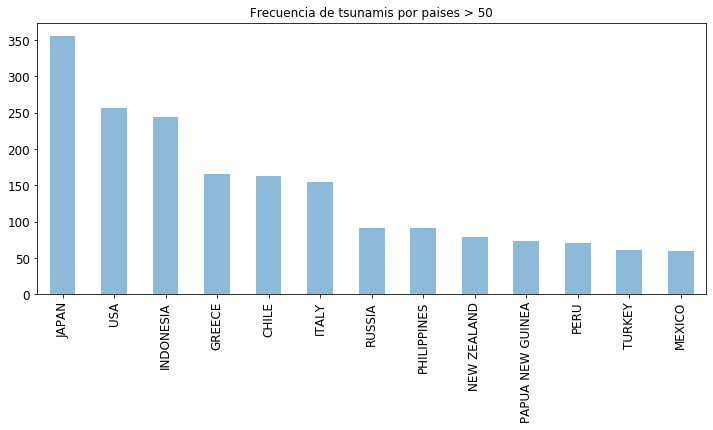

In [32]:
tsunami['COUNTRY_FRECUENCY'] = tsunami.groupby(tsunami_data.COUNTRY)['COUNTRY'].transform('count')
tsunami.COUNTRY[tsunami.COUNTRY_FRECUENCY > 50].value_counts().plot(kind='bar', legend=False, figsize=(12,5), 
                                            title="Frecuencia de tsunamis por paises > 50", fontsize=12, alpha=0.5);     


In [43]:
Year = []
for i in tsunami['YEAR']:
    if i > 2000:
        Year.append(i)

print(Year)
print(len(Year))

[2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 201

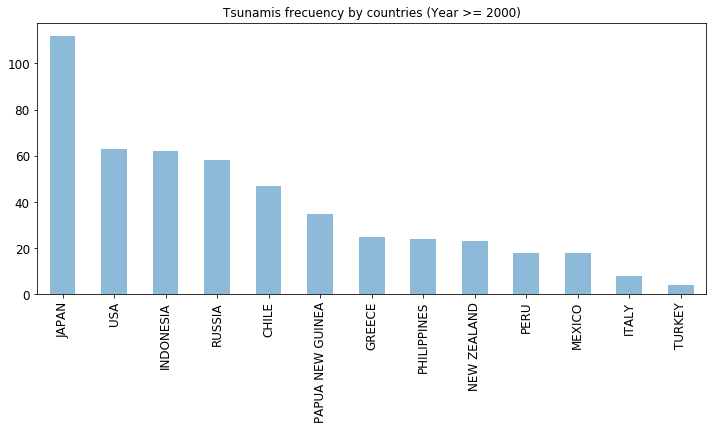

In [49]:
tsunami.COUNTRY[(tsunami.YEAR >= 1950) & (tsunami.COUNTRY_FRECUENCY > 50)].value_counts().plot(kind='bar',
                legend=False, figsize=(12,5), title="Tsunamis frecuency by countries (Year >= 2000)", fontsize=12, alpha=0.5); 
                                             
                                             
                                             
                                            
                                            
